In [47]:
import numpy as np

from PyEMD import EMD
from PyEMD import EEMD
from PyEMD import Visualisation
import numpy as np
import pylab as plt

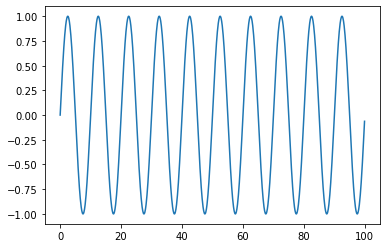

In [83]:
delta = 0.1
T = 100
f = .1

t = np.arange(0, T, delta)

S = np.sin(2*np.pi*(f+np.random.rand(len(t))*0.1)*t)
S = np.sin(2*np.pi*f*t)

plt.plot(t,S)

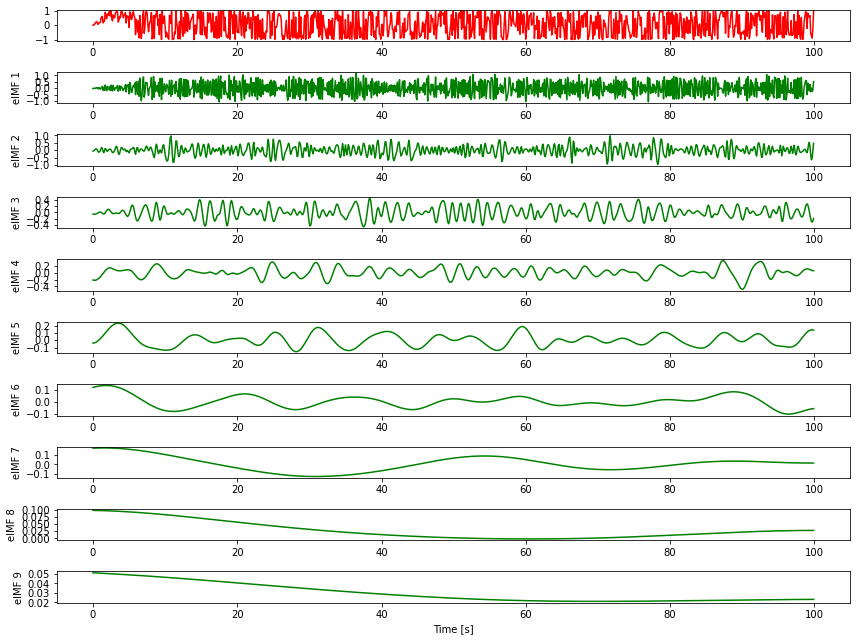

In [51]:
# Assign EEMD to `eemd` variable
eemd = EEMD()

# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection="parabol"

# Execute EEMD on S
eIMFs = eemd.eemd(S, t)
nIMFs = eIMFs.shape[0]

# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, S, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)
plt.show()

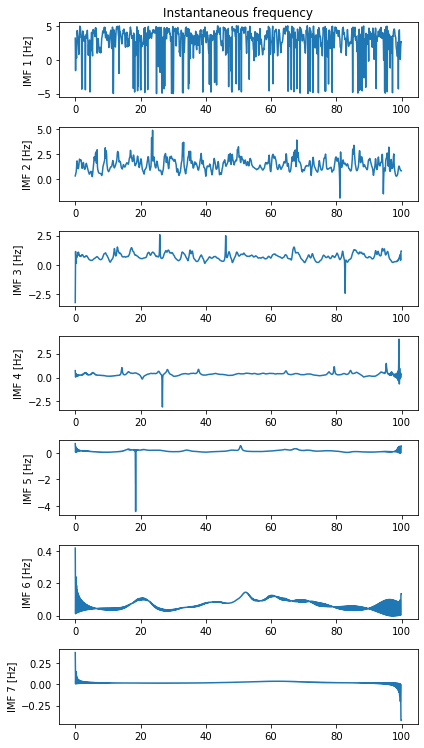

In [56]:
# Initiate visualisation with emd instance
vis = Visualisation(emd)


imfs, res = emd.get_imfs_and_residue()

# Create a plot with all IMFs and residue
# vis.plot_imfs(imfs=imfs, residue=res, t=t, include_residue=True)

# Create a plot with instantaneous frequency of all IMFs
vis.plot_instant_freq(t, imfs=imfs)

# Show both plots
vis.show()

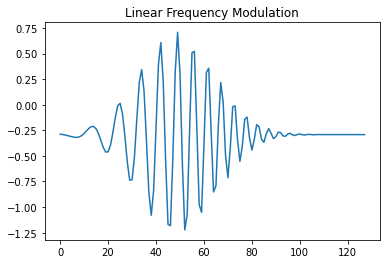

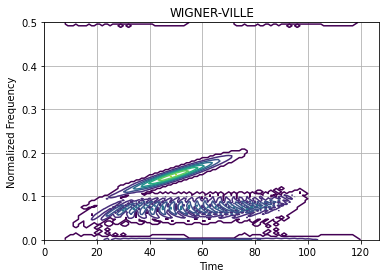

In [117]:
from tftb.generators import amgauss, fmlin
import matplotlib.pyplot as plt
import numpy as np
z = amgauss(128, 50, 40) * fmlin(128, 0.05, 0.3, 50)[0] + np.random.uniform(-1,1) + 0.01
plt.plot(np.real(z))
plt.title("Linear Frequency Modulation")
plt.show()


from tftb.processing import WignerVilleDistribution
wvd = WignerVilleDistribution(z)
wvd.run()
wvd.plot(kind='contour', extent=[0, 128, 0.01, 0.1])

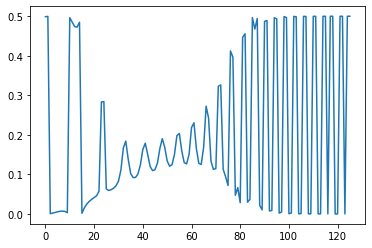

In [119]:
from tftb.processing import inst_freq, plotifl
ifr = inst_freq(z)[0]

plt.plot(ifr)

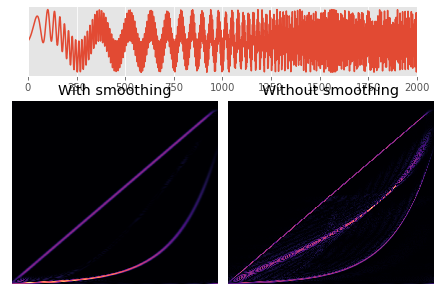

In [126]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 9.0
import matplotlib.pylab as plt
plt.style.use("ggplot")
from mtspec import wigner_ville_spectrum
from mtspec.util import linear_chirp, exponential_chirp
import numpy as np

fig = plt.figure()
data = linear_chirp() + exponential_chirp()

# Plot the data
ax1 = fig.add_axes([0.05,0.75, 0.90, 0.24])
ax1.plot(data)
ax1.set_xlim(0, len(data))
ax1.set_yticks([])

# Get the smoothed WV spectrum.
wv = wigner_ville_spectrum(data, 10, 5.0, smoothing_filter='gauss',
                           filter_width=25)

# Plot the WV
ax2 = fig.add_axes([0.01, 0.025, 0.48, 0.64])
ax2.set_yticks([])
ax2.set_xticks([])
ax2.imshow(abs(wv), interpolation='nearest', aspect='auto',
           cmap="magma")
ax2.set_title('With smoothing')

# Get the WV spectrum.
wv = wigner_ville_spectrum(data, 10, 5.0, smoothing_filter=None)

# Plot the WV
ax3 = fig.add_axes([0.51, 0.025, 0.48, 0.64])
ax3.set_yticks([])
ax3.set_xticks([])
ax3.imshow(abs(wv), interpolation='nearest', aspect='auto',
           cmap="magma")
ax3.set_title('Without smoothing')

plt.show()